In [18]:
import pymc as pm
import pandas as pd

import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Data/apache_sofa_treatment_63.csv', index_col=0)

In [10]:
df

,Age,Gender,Gender_n,liczba_dni,Days_till_death,zgon_w_szpit,30-day,1-year,3-year,Rozpoznania,...,APACHE_II,SOFA_pkt,Dtd_30d,Dtd_1y,Dtd_3y,Mtd_3y,APACHE>13,APACHE>15,SOFA>8,SOFA>6
62,85,m,1,7,NaN,0,0,0,0,CHF_nieniedokrwienna,...,7,7,30,366,1095,36,0,0,0,1
20,61,m,1,6,NaN,0,0,0,0,CHF_niedokrwienna,...,12,15,30,366,1095,36,0,0,1,1
46,63,k,0,1,3.0,1,1,1,1,CHF_nieniedokrwienna,...,14,10,3,3,3,0,1,0,1,1
10,41,m,1,2,26.0,1,1,1,1,CHF_niedokrwienna,...,9,6,26,26,26,0,0,0,0,0
28,68,m,1,7,7.0,1,1,1,1,CHF_niedokrwienna,...,10,6,7,7,7,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,87,k,0,1,1.0,1,1,1,1,CHF_niedokrwienna,...,19,8,1,1,1,0,1,1,0,1
30,86,k,0,2,20.0,1,1,1,1,CHF_niedokrwienna,...,13,10,20,20,20,0,0,0,1,1
68,78,k,0,8,320.0,0,0,1,1,CHF_niedokrwienna,...,16,8,30,320,320,10,1,1,0,1
49,59,k,0,3,NaN,0,0,0,0,CHF_niedokrwienna,...,11,4,30,366,1095,36,0,0,0,0


In [25]:
sample_poisson = df['APACHE_II']
print(sample_poisson.mean().round(2))

15.08


In [26]:
import seaborn as sns

def plot_hist(sample, **options):
    """Plot a histogram of APACHE_II.
    
    sample: sequence of values
    """
    sns.histplot(sample, stat='probability', discrete=True,
                 alpha=0.5, **options)
    
def legend(**options):
    """Make a legend only if there are labels."""
    handles, labels = plt.gca().get_legend_handles_labels()
    if len(labels):
        plt.legend(**options)
        
def decorate_goals(ylabel='Probability'):
    """Decorate the axes."""
    plt.xlabel('APACHE II socre')
    plt.ylabel(ylabel)
    plt.title('Distribution of APACHE II')
    legend()

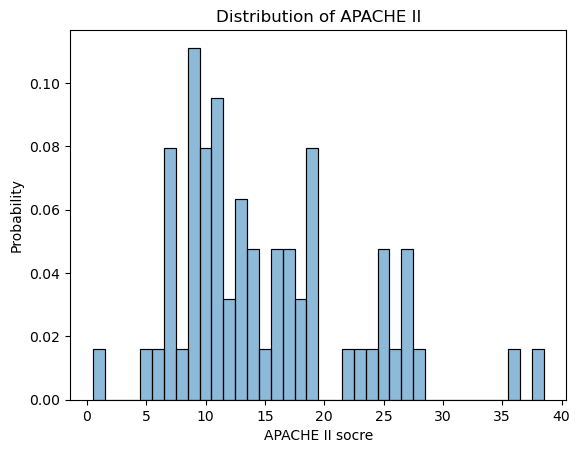

In [27]:
plot_hist(sample_poisson)
decorate_goals()

In [115]:
α = 20
β = 1.5

In [116]:
sample_gamma = pm.Gamma.dist(α, β)

In [117]:
def plot_kde(sample, **options):
    """Plot a distribution using KDE.
    
    sample: sequence of values
    """
    sns.kdeplot(sample, cut=0, **options)

def decorate_rate(ylabel='Likelihood'):
    """Decorate the axes."""
    plt.xlabel('Apache per patient')
    plt.ylabel(ylabel)
    plt.title('Distribution of APACHE scoring rate')
    legend()

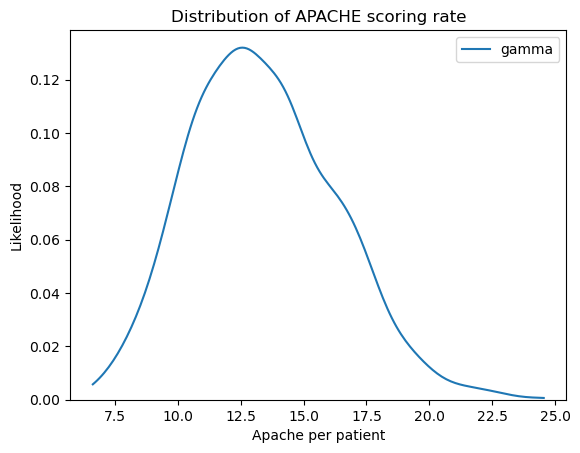

In [119]:
plot_kde(pm.draw(sample_gamma, 1000), label='gamma')
decorate_rate()

In [37]:
plot_kde(sample_gamma)


TypeError: object of type 'TensorVariable' has no len()